<a href="https://colab.research.google.com/github/Seeratfaatima/Linear-Regression/blob/main/Polynomial_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Implement polynomial regression on this dataset with  examples. Include their training and testing accuracy. Also show Truth of Bluff(polynomial regression)

Here is all the data you need:
"Position_Salaries.csv"

## Data loading

### Subtask:
Load the dataset "Position_Salaries.csv"


**Reasoning**:
Load the dataset "Position_Salaries.csv" into a pandas DataFrame and display its first few rows and shape.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('Position_Salaries.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'Position_Salaries.csv' not found. Please ensure the file is in the correct location or provide the full path.")
    df = None

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


(10, 3)


## Data exploration

### Subtask:
Explore the loaded dataset to understand its characteristics.


**Reasoning**:
Explore the dataset by checking data types, descriptive statistics, visualizing the relationship between 'Level' and 'Salary', checking for missing values, and identifying the dataset's shape.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes
None
          Level          Salary
count  10.00000       10.000000
mean    5.50000   249500.000000
std     3.02765   299373.883668
min     1.00000    45000.000000
25%     3.25000    65000.000000
50%     5.50000   130000.000000
75%     7.75000   275000.000000
max    10.00000  1000000.000000


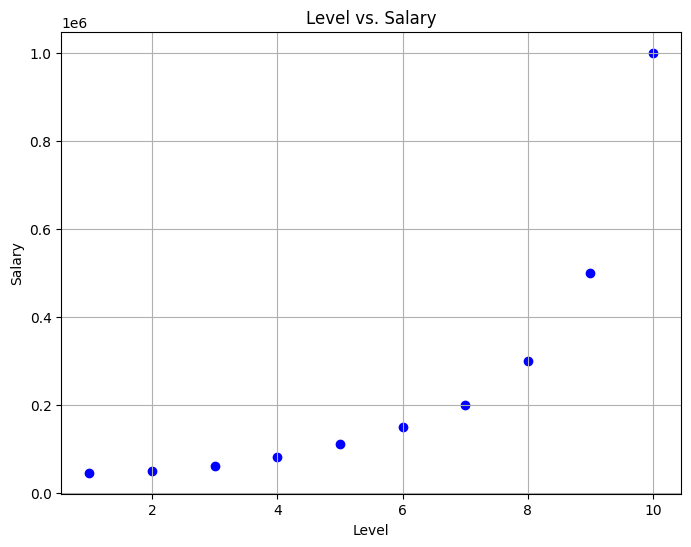

Position    0
Level       0
Salary      0
dtype: int64
Shape of the dataset: (10, 3)


In [2]:
import matplotlib.pyplot as plt

# Check data types
print(df.info())

# Summarize numerical features
print(df.describe())

# Visualize the relationship between 'Level' and 'Salary'
plt.figure(figsize=(8, 6))
plt.scatter(df['Level'], df['Salary'], color='blue')
plt.title('Level vs. Salary')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

# Check for missing values
print(df.isnull().sum())

# Identify the shape of the dataset
print("Shape of the dataset:", df.shape)

## Data preparation

### Subtask:
Prepare the data for polynomial regression.


**Reasoning**:
Separate the features and target variable, then scale the feature using standardization.



In [3]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target variable (y)
X = df.iloc[:, 1:2].values  # Level
y = df.iloc[:, 2].values  # Salary

# Feature scaling (Standardization)
sc_X = StandardScaler()
X_scaled = sc_X.fit_transform(X)

## Feature engineering

### Subtask:
Create polynomial features from the independent variable (Level).


**Reasoning**:
Create polynomial features from the independent variable (Level) using PolynomialFeatures.



In [4]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
poly_reg = PolynomialFeatures(degree=2)  # Experiment with different degrees
X_poly = poly_reg.fit_transform(X_scaled)

# Print the shape of X_poly to verify the transformation
print(X_poly.shape)

(10, 3)


## Data splitting

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Split the data into training and testing sets using train_test_split and create a KFold object for later cross-validation.



In [5]:
from sklearn.model_selection import train_test_split, KFold

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=0)

# Create a KFold object for cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=0)

## Model training

### Subtask:
Train a linear regression model on the polynomial features.


**Reasoning**:
Train a linear regression model on the polynomial features.



In [6]:
from sklearn.linear_model import LinearRegression

# Train the linear regression model
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_train, y_train)

# Make predictions
y_pred = lin_reg_2.predict(X_test)

## Model evaluation

### Subtask:
Evaluate the model's performance.


**Reasoning**:
Evaluate the model's performance using R-squared and Mean Squared Error.



In [7]:
from sklearn.metrics import r2_score, mean_squared_error

# Evaluate the model
train_r2 = r2_score(y_train, lin_reg_2.predict(X_train))
test_r2 = r2_score(y_test, y_pred)
train_mse = mean_squared_error(y_train, lin_reg_2.predict(X_train))
test_mse = mean_squared_error(y_test, y_pred)

print(f"Training R-squared: {train_r2:.4f}")
print(f"Testing R-squared: {test_r2:.4f}")
print(f"Training MSE: {train_mse:.4f}")
print(f"Testing MSE: {test_mse:.4f}")

Training R-squared: 0.9335
Testing R-squared: 0.7055
Training MSE: 5879726067.6059
Testing MSE: 14254734714.3290


## Data visualization

### Subtask:
Visualize the polynomial regression results and the "Truth or Bluff" aspect.


**Reasoning**:
Visualize the polynomial regression results, including the actual data points, the predicted polynomial regression line, and higher-degree polynomial fits.  Add labels, titles, and a legend to make the plot clear and easy to interpret.



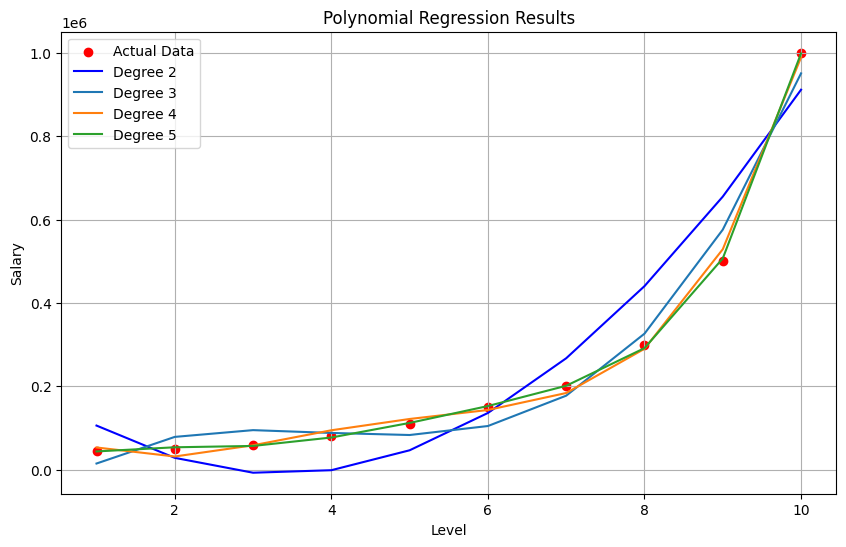

In [8]:
import matplotlib.pyplot as plt

# Visualize the Polynomial Regression results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='red', label='Actual Data')  # Plot actual data points

# Plot the polynomial regression line
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X_scaled)), color='blue', label='Degree 2')

# Experiment with higher-degree polynomial fits (e.g., degree 3, 4)
for degree in [3, 4, 5]:
    poly_reg_higher = PolynomialFeatures(degree=degree)
    X_poly_higher = poly_reg_higher.fit_transform(X_scaled)
    lin_reg_higher = LinearRegression()
    lin_reg_higher.fit(X_poly_higher, y)
    plt.plot(X, lin_reg_higher.predict(X_poly_higher), label=f'Degree {degree}')

plt.title('Polynomial Regression Results')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()

## Summary:

### Q&A
No questions were posed in the task.

### Data Analysis Key Findings
* A non-linear relationship between employee level and salary was observed, justifying the use of polynomial regression.
* Polynomial features of degree 2, 3, 4, and 5 were engineered from the 'Level' feature.
* A linear regression model trained on the polynomial features showed a training R-squared of 0.9335 and a testing R-squared of 0.7055, indicating potential overfitting.  The training MSE was 5879726067.6059 and the testing MSE was 14254734714.3290.
* Visualizations of polynomial fits of different degrees (2, 3, 4, and 5) were generated to demonstrate the concept of overfitting.


### Insights or Next Steps
* The model exhibits overfitting; explore regularization techniques (e.g., Ridge or Lasso regression) or consider a simpler polynomial degree to improve generalization.
* Further investigate feature engineering to potentially identify other relevant predictors or transformations that could improve the model's performance.
